# Instrument Classification - Part 2 : CNN

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten,Activation,BatchNormalization

In [10]:
x_train = np.load('x_trainB.npy')
x_test  = np.load('x_testB.npy')
y_train = np.load('y_trainB.npy')
y_test  = np.load('y_testB.npy')

print("Train Size:", x_train.shape)
print("Test  Size:", x_test.shape)

Train Size: (12401, 96, 87, 1)
Test  Size: (1378, 96, 87, 1)


In [11]:
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3),padding='same',strides=1,input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),padding='same',strides=1))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,kernel_size=(3,3),padding='same',strides=1))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(640,kernel_size=(3,3),padding='same',strides=1))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(BatchNormalization())
#model.add(Dropout(0.15))
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 96, 87, 64)        640       
_________________________________________________________________
batch_normalization_11 (Batc (None, 96, 87, 64)        256       
_________________________________________________________________
activation_12 (Activation)   (None, 96, 87, 64)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 48, 43, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 48, 43, 128)       73856     
_________________________________________________________________
batch_normalization_12 (Batc (None, 48, 43, 128)       512       
_________________________________________________________________
activation_13 (Activation)   (None, 48, 43, 128)       0         
__________

Train on 12401 samples, validate on 1378 samples
Epoch 1/10
12401/12401 [==============================] - 1109s 89ms/step - loss: 0.2190 - acc: 0.9094 - val_loss: 0.1806 - val_acc: 0.9332
Epoch 2/10
12401/12401 [==============================] - 1130s 91ms/step - loss: 0.1380 - acc: 0.9469 - val_loss: 0.1471 - val_acc: 0.9441
Epoch 3/10
12401/12401 [==============================] - 1063s 86ms/step - loss: 0.1101 - acc: 0.9597 - val_loss: 0.1264 - val_acc: 0.9528
Epoch 4/10
12401/12401 [==============================] - 1041s 84ms/step - loss: 0.0928 - acc: 0.9664 - val_loss: 0.1287 - val_acc: 0.9456
Epoch 5/10
12401/12401 [==============================] - 1025s 83ms/step - loss: 0.0788 - acc: 0.9735 - val_loss: 0.1419 - val_acc: 0.9434
Epoch 6/10
12401/12401 [==============================] - 1034s 83ms/step - loss: 0.0674 - acc: 0.9772 - val_loss: 0.1519 - val_acc: 0.9419
Epoch 7/10
12401/12401 [==============================] - 1034s 83ms/step - loss: 0.0566 - acc: 0.9826 - val_lo

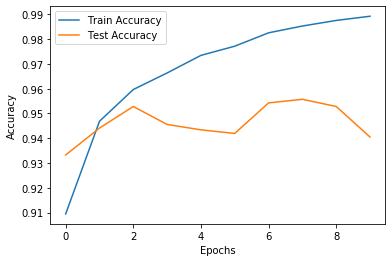

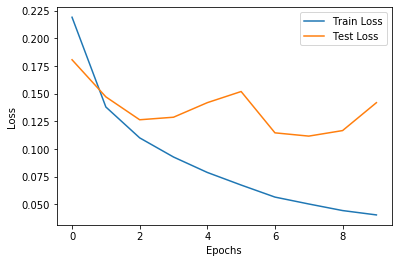

In [12]:
sgd = keras.optimizers.SGD(lr=0.0001, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))

plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy-Loss')
plt.legend()

model.save('ICmodel_les.h5')